# Implement SVR model

In [7]:
import warnings
warnings.filterwarnings('ignore')

from time import time
from datetime import timedelta

import pandas as pd
import seaborn as sns
import numpy as np


from scipy.stats import chi2_contingency 
from scipy.stats import pearsonr 

from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error, mean_absolute_error
from sklearn.preprocessing import minmax_scale

from sklearn.svm import LinearSVR, SVR, SVC
from sklearn.neighbors import KNeighborsRegressor

from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from dython.nominal import associations
from dython.nominal import correlation_ratio
from dython.nominal import cramers_v

from matplotlib import pyplot as plt

from get_metrics import write_metrics_in_csv

In [24]:
# Open dataset
filename: str = 'dataset.csv'
dataset = pd.read_pickle('dataRead_processed.pkl.bz2', compression='bz2')

# Split dataset
X = dataset.drop(columns=['total_passengers_2022'])
y = dataset['total_passengers_2022']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [32]:
def minimum_preprocessing(X, y):
    print('Original shape:{}'.format(X.shape))
    # We kill categorical columns
    X = X.drop(columns=X.select_dtypes(include='object').columns)
    X = X.drop(columns=X.select_dtypes(include='category').columns)
    # We remove missing values
    X=X.dropna()
    y=y[X.index]
    # Normalize
    
    print(X.dtypes)
    # X = minmax_scale(X)
    # print('New shape:{}'.format(X.shape))
    return X, y

X_train, y_train = minimum_preprocessing(X_train,y_train)
X_test, y_test = minimum_preprocessing(X_test,y_test)

Original shape:(1491, 31)
total_passengers_and_non_passengers_2022            float64
total_passengers_2015                               float64
total_passengers_and_non_passengers_2015            float64
wifi_service                                          int64
city_category_in_attraction_area_2020                 int64
department                                            int64
region                                                int64
sum_municipal_population_2021                         int64
non_scholarized_15_years_old_or_more_2020             int64
main_residences_2020                                  int64
housing_2020                                          int64
jobs_at_workplace_2020                                int64
hotels_2024_sum                                       int64
camping_sites_2024_sum                                int64
other_tourist_accommodations_2024_sum                 int64
latitude                                            float64
longitude     

<Axes: xlabel='total_passengers_2022'>

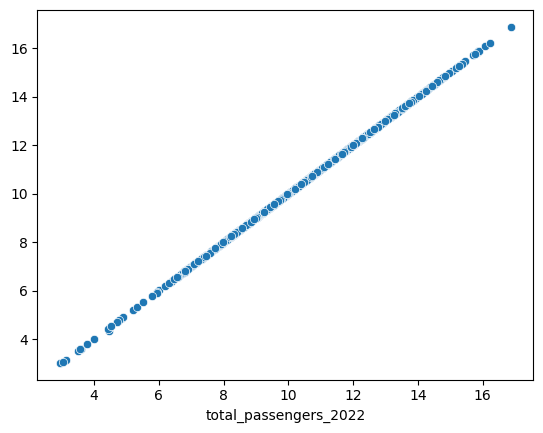

In [34]:
svm = LinearSVR()

svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

model = 'SVR'
hyperparameters = {'type': 'linear', 'C': 1, 'epsilon': 0}

write_metrics_in_csv(y_test, y_pred, model, hyperparameters)


sns.scatterplot(x=np.log(y_test), y=np.log(y_pred))